### Quantum representiatons for JSSP

In this notebook different quantum representations are investigated

In [6]:
from direct_representations import apply_operation_based_bierwirth
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns
from typing import List
import math

In [41]:
np.random.normal(3, 0)

3.0

In [42]:
int(np.log2(10) + 1)

4

In [43]:
jssp_problem = np.array([
          # Technological sequence. Each row represents one job J. Each column represents the operation index.
          [[2, 3, 1],
           [1, 2, 3],
           [1, 3, 2]],
          # The second matrix contains the processing time
          [[1, 5, 2],
           [3, 3, 5],
           [2, 2, 4]]
        ])

jssp_problem[0] = jssp_problem[0]-1


In [67]:
120**5

24883200000

4
16.0
216
262144.0
331776
2821109907455.9966


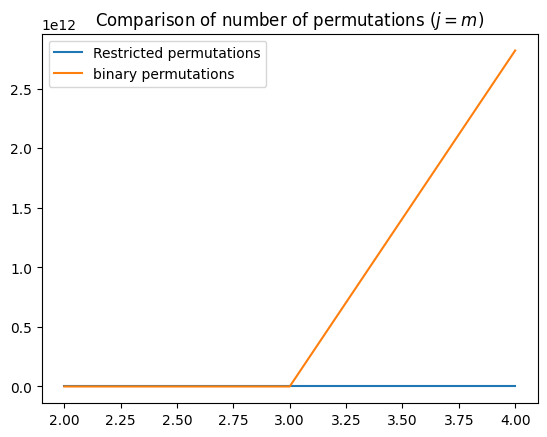

In [66]:
j = np.arange(2, 5, 1)
y = np.empty(len(j))
y2 = np.empty(len(j))
for i, j_number in enumerate(j):
    y_1_temp = math.factorial(int(j_number))**j_number
    print(y_1_temp)
    y[i] = y_1_temp

    y_2_temp = 2**(j_number*j_number*(np.log2(j_number-1)+1))
    print(y_2_temp)
    y2[i] = y_2_temp

plt.title("Comparison of number of permutations ($j=m$)")
plt.plot(j, y, label="Restricted permutations")
plt.plot(j, y2, label="binary permutations")
plt.legend()

In [92]:
x = 10
print(int(math.log2((math.factorial(x**2)/math.factorial(x)**x) - 1)+1))

307


In [63]:
for j_temp in j:
    print(math.factorial(j_temp)**j_temp)

4.0


C:\Users\b-mor\AppData\Local\Temp\ipykernel_23868\1122691915.py:2: DeprecationWarning: Using factorial() with floats is deprecated
  print(math.factorial(j_temp)**j_temp)


3.0
5.169925001442312
7.584962500721156
10.228818690495881
13.076815597050832
16.10656294044488
19.29920801838728
22.639058021271904
26.112989209604315
29.70992435199155
31.436439091923276
37.23633467035759
41.150604796331706
45.15703106549114
49.25014046988262
53.4250661523833
57.67745331401758
62.003383339462445
nan


C:\Users\b-mor\AppData\Local\Temp\ipykernel_23868\3342424666.py:5: RuntimeWarning: overflow encountered in scalar multiply
  cur_val = np.log2(math.factorial(j_number)*j_number) + 1
C:\Users\b-mor\AppData\Local\Temp\ipykernel_23868\3342424666.py:5: RuntimeWarning: invalid value encountered in log2
  cur_val = np.log2(math.factorial(j_number)*j_number) + 1


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log2 method

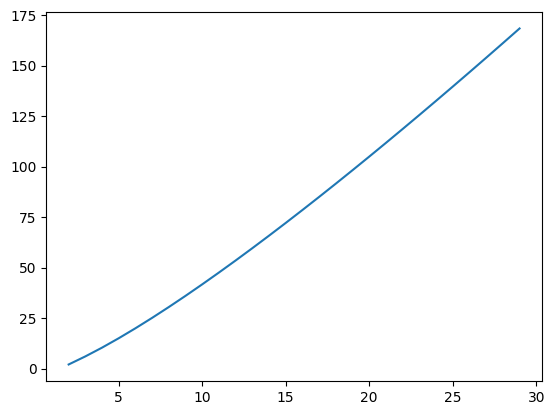

In [32]:
j = np.arange(2, 30, 1)
plt.plot(j, (np.log2(j-1) + 1)*j, label="normal")
y = np.empty(len(j))
for i, j_number in enumerate(j):
    cur_val = np.log2(math.factorial(j_number)*j_number) + 1
    print(cur_val)
    y[i] = cur_val


plt.plot(j, y, label="factorial")
#n_permutations = math.factorial(j)*m
plt.ylabel("Number of bits")
plt.xlabel("number of jobs")

plt.legend()

In [4]:
test % 3

array([0, 1, 2, 1, 0], dtype=int32)

Working on the schedule builder for the quantum bit representation

In [44]:
class Operation:
    def __init__(self, job, machine, duration, start):
        self.job = job
        self.machine = machine
        self.duration = duration
        self.start = start

    def get_completion_time(self):
        return self.start + self.duration

    def __str__(self):
        return f"Operation_{self.job}_{self.machine}"
    
# First we need the set of schedulable operations
j = 3
m = 3

test_permutation = Q_chromosome(j, m, conversion_method="Hashing")    


In [46]:
test_permutation.permutation.ravel()

array([1, 2, 0, 2, 1, 0, 0, 2, 1])

## Analysing distribution of mapping between bit-string and permutations

In [28]:
n = 4

data_dict = {"Permutation" : [], "Binary" : [], "Binary_value" : [], "Method" : []}
for i in range(1000):
    for method in ["New", "Old", "Hashing"]:
        cur_chromo = Q_chromosome(n, 2, conversion_method=method)
        data_dict["Permutation"].append(str(cur_chromo.permutation[0]).replace("[", "").replace("]", "").replace(" ", "").replace("\n", ""))
        data_dict["Binary"].append(str(cur_chromo.x[0].astype(int)).replace("[", "").replace("]", "").replace(" ", "").replace("\n", ""))
        data_dict["Binary_value"].append(int(str(cur_chromo.x[0].astype(int)).replace("[", "").replace("]", "").replace(" ", "").replace("\n", ""), 2))
        data_dict["Method"].append(method)

df_conversion_method = pd.DataFrame(data_dict)
df_conversion_method

,Permutation,Binary,Binary_value,Method
0,3012,01010100,84,New
1,2103,10011001,153,Old
2,1320,11001011,203,Hashing
3,0231,01100101,101,New
4,3102,11010101,213,Old
...,...,...,...,...
2995,2301,10110011,179,Old
2996,0123,00000000,0,Hashing
2997,0123,01010111,87,New
2998,2013,10100111,167,Old


In [29]:
unique_df = df_conversion_method.groupby(["Method"]).agg(lambda x: len(np.unique(x)))
unique_df

,Permutation,Binary,Binary_value
Method,,,
Hashing,24,256,256
New,24,250,250
Old,24,253,253


In [30]:
unique_2 = df_conversion_method.groupby(["Method", "Permutation"]).agg(lambda x: len(np.unique(x)))#len(np.unique(x)))
unique_2


Binary  Binary_value
Method  Permutation                      
Hashing 0123             11            11
        0132             11            11
        0213             11            11
        0231             11            11
        0312             11            11
...                     ...           ...
Old     3021             10            10
        3102             13            13
        3120              8             8
        3201             11            11
        3210              7             7

[72 rows x 2 columns]

In [31]:
unique_2.reset_index(drop=False).groupby("Method")["Binary"].max()

Method
Hashing    11
New        34
Old        15
Name: Binary, dtype: int64

In [32]:
unique_2.reset_index(drop=False).groupby("Method")["Binary"].std()

Method
Hashing    0.481543
New        7.156126
Old        2.765929
Name: Binary, dtype: float64

It can be observed that the conversion mechanism with argsort leads to better distribution of unique binary string. This should help in preventing certain permutations to be less likely to obtain.

What we can observe is that there are several bit string that correspond to a single permutation. As a result there are several individuals in the solution space that are equal. An additional question would be: are the equvalent solutions grouped together in the solution space (how does the solution space look?), and more importantly is it beneficial to the overall algorithm to have the equvalent solutions grouped together or spread out in solution space? To determine this, new conversion algorithm should be found for comparison.

1. How do we measure distance between solutions in solution space?
2. Find a way to improve the grouping and distribution of unique bit strings.

Idea - count differences in the bit string

In [ ]:
df_conversion_method["One_count"] = df_conversion_method["Binary"].transform(lambda x: len(x.replace("0", "")))
df_conversion_method

,Permutation,Binary,Binary_value,Method,One_count
0,201,101001,41,New,3
1,012,001100,12,Old,2
2,102,100110,38,New,3
3,210,100111,39,Old,4
4,012,000101,5,New,2
...,...,...,...,...,...
1995,012,111110,62,Old,5
1996,012,001011,11,New,3
1997,201,101111,47,Old,5
1998,012,001011,11,New,3


<Axes: title={'center': 'Clustering new method'}, xlabel='One_count', ylabel='Binary_value'>

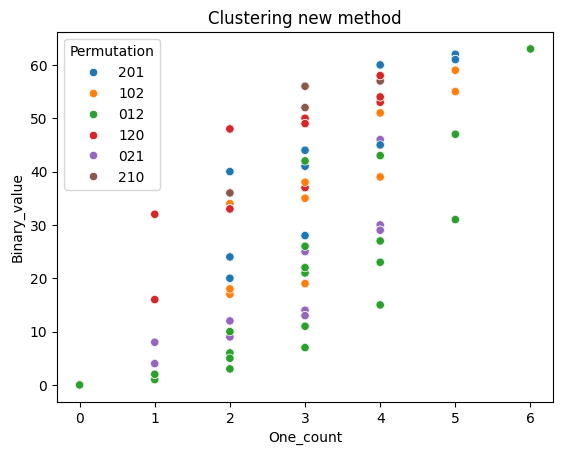

In [ ]:
plt.title("Clustering new method")
sns.scatterplot(data=df_conversion_method[df_conversion_method["Method"] == "New"], x="One_count", y="Binary_value", hue="Permutation")

<Axes: title={'center': 'Clustering old method'}, xlabel='One_count', ylabel='Binary_value'>

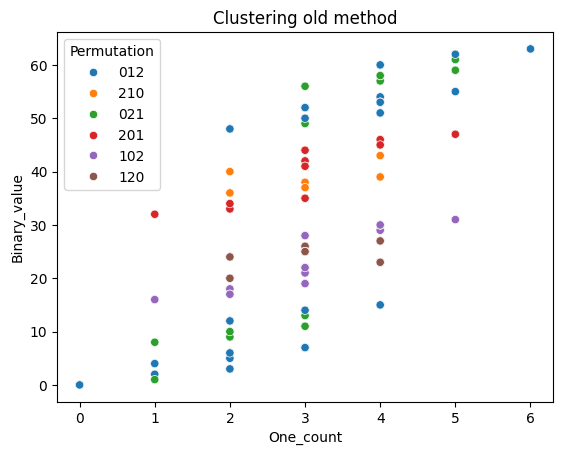

In [ ]:
plt.title("Clustering old method")
sns.scatterplot(data=df_conversion_method[df_conversion_method["Method"] == "Old"], x="One_count", y="Binary_value", hue="Permutation")

In [ ]:
df_conversion_method

,Permutation,Binary,Binary_value,Method,One_count
0,201,101001,41,New,3
1,012,001100,12,Old,2
2,102,100110,38,New,3
3,210,100111,39,Old,4
4,012,000101,5,New,2
...,...,...,...,...,...
1995,012,111110,62,Old,5
1996,012,001011,11,New,3
1997,201,101111,47,Old,5
1998,012,001011,11,New,3


In [ ]:
test1 = np.array(list("001010"), dtype=int)
test2 = np.array(list("111011"), dtype=int)

print(np.sum((test1 - test2)*-1))

3


In [ ]:
def calc_spread(x: pd.Series):
    x = x.to_numpy()
    Q = len(x)
    total_counter = 0
    distance_sum = 0
    for i in range(Q):
        test1 = np.array(list(x[i]), dtype=int)
        for j in range(i, Q):
            
            np.array(list(x[j]), dtype=int)
            distance_sum += np.sum((test1 - test2)*-1)
            total_counter += 1

    return distance_sum/total_counter

In [ ]:
disp_dist = df_conversion_method.groupby(["Method", "Permutation"])["Binary"].agg(lambda x: calc_spread(x)).reset_index(drop=False)
disp_dist

,Method,Permutation,Binary
0,New,012,2.228571
1,New,021,2.391578
2,New,102,1.710419
3,New,120,2.436202
4,New,201,1.700029
5,New,210,1.933881
6,Old,012,2.090436
7,Old,021,2.124906
8,Old,102,1.944332
9,Old,120,1.919798


<Axes: xlabel='Permutation', ylabel='Binary'>

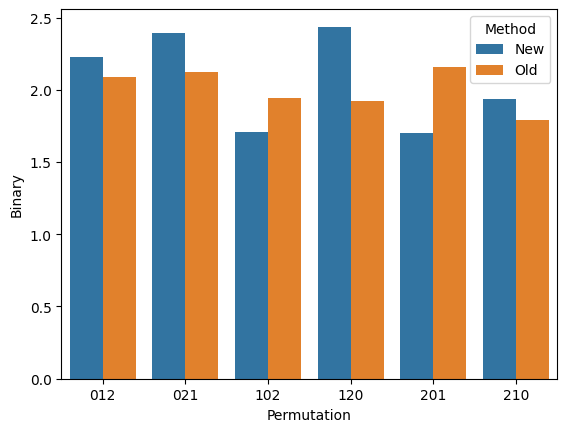

In [ ]:
sns.barplot(data=disp_dist, x="Permutation", y="Binary", hue="Method")

We can clearly see that the old method is better at clustering the solutions together with respect to the value of the 

The following section is dedicated toward finding a method that distributes the bit strings more evenly accross permutations. The key is to find a mapping.

[0, 1, 2] \
[0, 2, 1] \
[1, 0, 2] \
[1, 2, 0] \
[2, 0, 1] \
[2, 1, 0] 

6

720
[0.         1.55291427 3.         4.24264069 5.19615242 5.79555496
 6.         5.79555496 5.19615242 4.24264069]


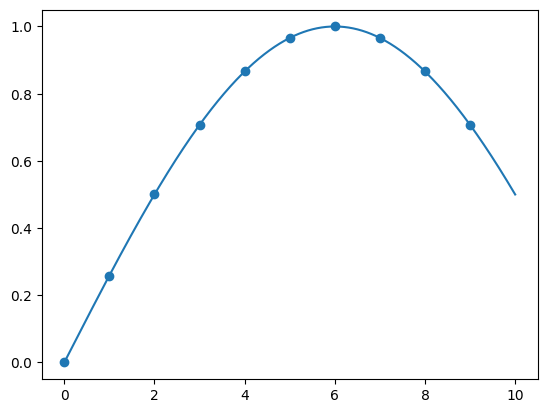

In [ ]:
j = 3
print(math.factorial(j*(int(np.log2(j-1))+1)))
#x = np.arange(0, math.factorial(j*(int(np.log2(j-1))+1)))
X = np.linspace(0, 10, 1000)
x = np.arange(0, 10)
cur_func = lambda x: np.abs(np.sin(x* (np.pi/(math.factorial(j)*2))))
plt.scatter(x, cur_func(x))
y_vals = cur_func(x)
plt.plot(X, cur_func(X))
print(y_vals*math.factorial(j))


In [ ]:
x = np.array([1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
(-1)**(np.floor(x / math.factorial(3)))


array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.])

In [94]:
def perodic_mapping_1(x, j):
    sign = (-1)**(np.floor(x / math.factorial(j)))
    y = (math.factorial(j)-1 - ((x) % math.factorial(j))) - sign*(math.factorial(j)-1 - ((x) % math.factorial(j))) + x % math.factorial(j) + sign*(x % math.factorial(j))
    return y

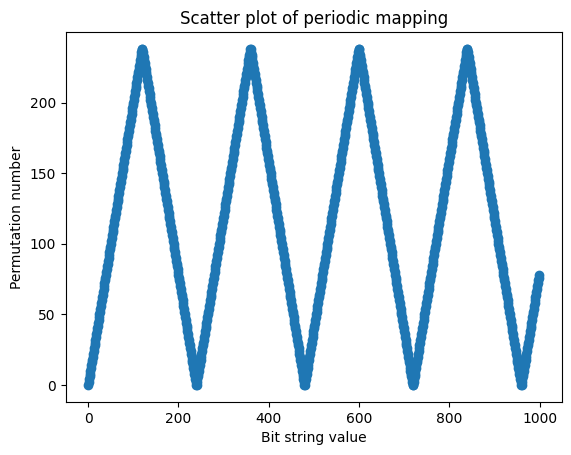

In [95]:
x = np.arange(0, 1000)
#y = x % math.factorial(3)
#y_2 = math.factorial(3)-1 - ((x+1) % math.factorial(3))
y = perodic_mapping_1(x, 5)
plt.title("Scatter plot of periodic mapping")
plt.xlabel("Bit string value")
plt.ylabel("Permutation number")
plt.scatter(x,y)

In [55]:
import math
import numpy as np

6.0


In [126]:

def combinations(iterable, r, comb_number):
    # Function taken from https://docs.python.org/3/library/itertools.html#itertools.combinations
    # combinations('ABCD', 2) → AB AC AD BC BD CD
    # combinations(range(4), 3) → 012 013 023 123

    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    counter = 0
    cur_combination = tuple(pool[i] for i in indices)
    if counter == comb_number:
        return cur_combination
    
    counter += 1
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return cur_combination
        indices[i] += 1
        for j in range(i+1, r):
            # If i is not the last in the selection r, make sure to reset the indice to the right.
            indices[j] = indices[j-1] + 1
        cur_combination = tuple(pool[i] for i in indices)
        if counter == comb_number:
            return cur_combination
        
        counter += 1

In [179]:
j = 3
m = 4
max_perm_num = math.factorial(m*j)/(math.factorial(m)**j)
#perm_number = 6
print(max_perm_num)
comparison_list = []
for perm_number in range(int(max_perm_num)):
    final_result = np.ones(m*j, dtype=int)*-1
    for k in range(j):
        # For each job
        cur_max = m*(j-k-1)
        if cur_max == 0:
            # Add the last job number in the remaining spaces
            final_result[final_result == -1] = k
        else:
            cur_count = math.factorial(cur_max)/(math.factorial(m))**(j-k-1)
            
            cur_period_number = int(perm_number / cur_count)
            perm_number = perm_number % cur_count

            temp_comb = combinations(range(m*(j-k)), m, cur_period_number)
            # Add the job numbers into the permutation array
            temp_final_result = final_result[final_result == -1]
            for i in temp_comb:
                temp_final_result[i] = k

            final_result[final_result == -1] = temp_final_result
            

    print(final_result)
    comparison_list.append(str(final_result))

print(len(np.asarray(comparison_list)))
print(len(np.unique(np.asarray(comparison_list))))

34650.0
[0 0 0 0 1 1 1 1 2 2 2 2]
[0 0 0 0 1 1 1 2 1 2 2 2]
[0 0 0 0 1 1 1 2 2 1 2 2]
[0 0 0 0 1 1 1 2 2 2 1 2]
[0 0 0 0 1 1 1 2 2 2 2 1]
[0 0 0 0 1 1 2 1 1 2 2 2]
[0 0 0 0 1 1 2 1 2 1 2 2]
[0 0 0 0 1 1 2 1 2 2 1 2]
[0 0 0 0 1 1 2 1 2 2 2 1]
[0 0 0 0 1 1 2 2 1 1 2 2]
[0 0 0 0 1 1 2 2 1 2 1 2]
[0 0 0 0 1 1 2 2 1 2 2 1]
[0 0 0 0 1 1 2 2 2 1 1 2]
[0 0 0 0 1 1 2 2 2 1 2 1]
[0 0 0 0 1 1 2 2 2 2 1 1]
[0 0 0 0 1 2 1 1 1 2 2 2]
[0 0 0 0 1 2 1 1 2 1 2 2]
[0 0 0 0 1 2 1 1 2 2 1 2]
[0 0 0 0 1 2 1 1 2 2 2 1]
[0 0 0 0 1 2 1 2 1 1 2 2]
[0 0 0 0 1 2 1 2 1 2 1 2]
[0 0 0 0 1 2 1 2 1 2 2 1]
[0 0 0 0 1 2 1 2 2 1 1 2]
[0 0 0 0 1 2 1 2 2 1 2 1]
[0 0 0 0 1 2 1 2 2 2 1 1]
[0 0 0 0 1 2 2 1 1 1 2 2]
[0 0 0 0 1 2 2 1 1 2 1 2]
[0 0 0 0 1 2 2 1 1 2 2 1]
[0 0 0 0 1 2 2 1 2 1 1 2]
[0 0 0 0 1 2 2 1 2 1 2 1]
[0 0 0 0 1 2 2 1 2 2 1 1]
[0 0 0 0 1 2 2 2 1 1 1 2]
[0 0 0 0 1 2 2 2 1 1 2 1]
[0 0 0 0 1 2 2 2 1 2 1 1]
[0 0 0 0 1 2 2 2 2 1 1 1]
[0 0 0 0 2 1 1 1 1 2 2 2]
[0 0 0 0 2 1 1 1 2 1 2 2]
[0 0 0 0 2 1 1 1 2 2 1 2]
[0 0

In [91]:
print(combinations(range(10), 3, 1))

(0, 1, 3)


In [92]:
for perm_number in range(int(math.factorial(5)/(math.factorial(2)*math.factorial(5-2)))):
    print(combinations(range(5), 2, perm_number))

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [ ]:
# Permutation 3 should be [1, 2, 0] in [0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]
def get_permutation(n: int, j: int):
    """This method is used to map an integer n to a permutation of j job numbers (j! possible permutations).
    Thus n must be between 0 and j!-1

    Parameters
    ----------
    n : int
        Permuation number
    j : int
        number of jobs (permutation size)
    """
    i = j
    p_next = n
    result = np.empty(i, dtype=int)
    selectables = np.arange(i)
    for k in range(len(result)):
        j = i - k - 1
        cur_select_index = int(p_next / math.factorial(j))
        cur_job_number = selectables[selectables != -1][cur_select_index]
        result[k] = cur_job_number
        # Remove cur_job number form available jobs for next iteration
        selectables[cur_job_number] = -1
        p_next = p_next % math.factorial(j)

    return result

#for i in range(math.factorial(10)):
print(get_permutation(100, 1000))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:

def plot_gnatt_chart(operation_list):
    op_list = []
    for op in operation_list:
        op_list.append({"Task" : "M" + str(op.machine), "start_time" : op.start, "stop_time" : op.start + op.duration, "operation" : "O_" + str(op.job) + "," + str(op.machine)})

    df = pd.DataFrame(op_list)
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    start_time = 0
    stop_time = df["stop_time"].max()
    n_rows = df["Task"].unique().shape[0]
    color_dict = {i : np.random.randint(0, 256, 3) for i in range(0, n_rows)}
    # Initiate all cells to white (255, 255, 255)
    image = np.ones((n_rows, int(stop_time), 3), dtype=int) * 255
    for operation in op_list:
        cur_job = int(operation["operation"][2])
        machine_number = int(operation["Task"][-1])
        image[machine_number][int(operation["start_time"]) : int(operation["stop_time"])][:] = color_dict[cur_job]

    # Create color patches
    handlers = []
    for i, color in color_dict.items():
        handlers.append(mpatches.Patch(color=color/255, label=f'$Job\;{i}$'))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(handles=handlers, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title("Schedule Gantt Chart")
    ax.set_yticks([0,1,2])
    ax.set_yticklabels(["M1", "M2", "M3"])

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

    ax.imshow(image)
    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    plt.show()

In [ ]:

def convert_bin_to_decimal(bin_array):
    bin_expo = np.repeat(np.arange(-bin_array.shape[0]+1, 1).reshape(-1, 1), bin_array.shape[1], axis=1).T*-1 #(np.arange(-len(bin_array)+1, 1)*-1)
    return np.sum(bin_array * 2**bin_expo,)

indexes = np.arange(cur_chromosome.n)*cur_chromosome.n_bits
cur_permutation = np.zeros((cur_chromosome.m, cur_chromosome.n), dtype=int)
for i in range(1, len(indexes)):
    cur_permutation[:, i] = convert_bin_to_decimal(cur_chromosome.x[ : , indexes[i-1] : indexes[i]]).T

cur_permutation = cur_permutation % cur_chromosome.n

print(cur_permutation)

ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

In [ ]:
for i, row in enumerate(cur_permutation):
    cur_permutation[i, :] = row + 1

cur_permutation

array([[1, 1, 7, 3, 5, 3, 9, 3, 1, 3],
       [1, 1, 7, 3, 5, 3, 9, 3, 1, 3],
       [1, 1, 7, 3, 5, 3, 9, 3, 1, 3],
       [1, 1, 7, 3, 5, 3, 9, 3, 1, 3]], dtype=int32)

In [ ]:
a = np.arange(6).reshape(2,3)
for x in np.nditer(a, flags=['external_loop'], order='F'):
    print(x, end=' ')

[0 3] [1 4] [2 5] 

In [ ]:
with np.nditer(cur_permutation.transpose((1, 0)), flags=['external_loop'], op_flags=['readwrite'], order='F') as job_seq:
    print(job_seq.shape)
    couter = 0
    for i in job_seq:
        print(i, end=' ')

(40,)
[0 0 6 2 4 2 8 2 0 2 0 0 6 2 4 2 8 2 0 2 0 0 6 2 4 2 8 2 0 2 0 0 6 2 4 2 8
 2 0 2] 

In [ ]:
dir(job_seq)

['__class__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'copy',
 'debug_print',
 'dtypes',
 'enable_external_loop',
 'finished',
 'has_delayed_bufalloc',
 'has_index',
 'has_multi_index',
 'index',
 'iterationneedsapi',
 'iterindex',
 'iternext',
 'iterrange',
 'itersize',
 'itviews',
 'multi_index',
 'ndim',
 'nop',
 'operands',
 'remove_axis',
 'remove_multi_index',
 'reset',
 'shape',
 'value']

In [ ]:
cur_chromosome.n

10

In [ ]:
def convert_bin_to_decimal(bin_array):
    bin_expo = np.repeat(np.arange(-bin_array.shape[0]+1, 1).reshape(-1, 1), bin_array.shape[1], axis=1).T*-1 #(np.arange(-len(bin_array)+1, 1)*-1)
    return np.sum(bin_array * 2**bin_expo, axis=1)

indexes = np.arange(1, cur_chromosome.n)*cur_chromosome.n_bits
print(indexes)
temp_res = np.split(cur_chromosome.x, indexes, axis=1)


[ 4  8 12 16 20 24 28 32 36]


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
cur_chromosome.permutation

AttributeError: 'Q_chromosome' object has no attribute 'permutation'

In [ ]:
cur_b = b.x
cur_x = cur_chromosome.x
rotation_angles = np.array([0.2*np.pi, 0, 0.5*np.pi, 0, 0.5*np.pi, 0.5*np.pi, 0, 0.2*np.pi])
signs = np.array([-1, 0, 1, 0, -1, 0, 1, 0])
for i in range(len(cur_x)):
    pi = cur_x[i]
    bi = cur_b[i]
    better = int(True)
    index = int(str(pi) + str(bi) + str(better), 2)
    cur_sign = cur_chromosome.alpha_amplitudes[i] * cur_chromosome.beta_amplitudes[i]
    if cur_sign > 0:
        cur_angle = rotation_angles[index] * signs[index]
    else:
        cur_angle = rotation_angles[index] * signs[index] * -1

    # Apply the rotation
    new_a = np.cos(cur_angle) - np.sin(cur_angle)
    new_b = np.sin(cur_angle) + np.cos(cur_angle)

    cur_chromosome.alpha_amplitudes[i] = new_a
    cur_chromosome.beta_amplitudes[i] = new_b
    
